In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math

#한글 깨짐 방지 코드
from matplotlib import rc, style, font_manager
font_name = font_manager.FontProperties(fname="C:/windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')

import pandas as pd

### 시트9, 11취합: 시간대별_거주인구_방문인구_현황

In [44]:
df = pd.read_excel("C:/Users/user/Desktop/평창군데이터/평창군데이터_전처리/sheet(9,11취합).xlsx")
df

,기준년월,시군구,읍면동,시간구분,거주인구,정기방문인구,비정기방문인구
0,202211,평창군,대화면,00시,5056,363,731
1,202211,평창군,대화면,01시,5061,362,732
2,202211,평창군,대화면,02시,5066,365,730
3,202211,평창군,대화면,03시,5061,367,728
4,202211,평창군,대화면,04시,5056,367,733
...,...,...,...,...,...,...,...
2491,202111,평창군,대관령면,19시,7473,876,6769
2492,202111,평창군,대관령면,20시,7581,816,6570
2493,202111,평창군,대관령면,21시,7670,776,6522
2494,202111,평창군,대관령면,22시,7715,724,6422


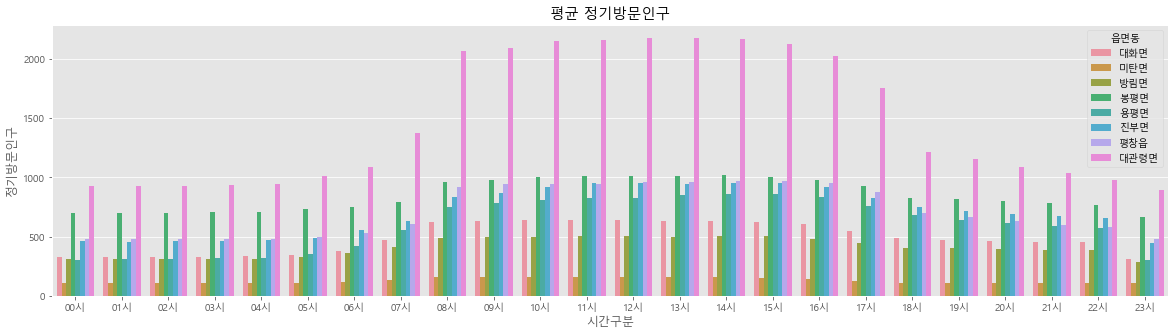

In [55]:
plt.figure(figsize=(20,5))
sns.barplot(x='시간구분',y='정기방문인구', hue='읍면동', data=df,ci=None)
plt.title('평균 정기방문인구')
plt.show();

### 시트12: 실거주지가 나와있는 데이터

In [1]:
df1 = pd.read_excel("C:/Users/user/Desktop/평창군데이터/평창군데이터_전처리/sheet12.xlsx")
df1

,기준년월,시군구,거주시군구,읍면동,거주읍면동,합계,무박인구수,숙박인구수
0,202211,평창군,평창군,대화면,NaN,157,107,50
1,202211,평창군,평창군,대화면,NaN,92,33,59
2,202211,평창군,평창군,대화면,NaN,61,51,10
3,202211,평창군,평창군,대화면,NaN,57,42,15
4,202211,평창군,평창군,대화면,NaN,41,31,10
...,...,...,...,...,...,...,...,...
85456,202111,평창군,부산진구,대관령면,NaN,1,1,0
85457,202111,평창군,달서구,대관령면,NaN,1,1,0
85458,202111,평창군,수원시 팔달구,대관령면,NaN,1,1,0
85459,202111,평창군,가평군,대관령면,NaN,1,1,0


In [2]:
df1 = df1.drop(columns=['거주읍면동'],axis=1)
df1.head()

,기준년월,시군구,거주시군구,읍면동,합계,무박인구수,숙박인구수
0,202211,평창군,평창군,대화면,157,107,50
1,202211,평창군,평창군,대화면,92,33,59
2,202211,평창군,평창군,대화면,61,51,10
3,202211,평창군,평창군,대화면,57,42,15
4,202211,평창군,평창군,대화면,41,31,10


In [8]:
value_counts = df1['거주시군구'].value_counts()

df1 = df1[df1['거주시군구'].isin(value_counts[value_counts >= 100].index)]
df1

,기준년월,시군구,거주시군구,읍면동,합계,무박인구수,숙박인구수
0,202211,평창군,평창군,대화면,157,107,50
1,202211,평창군,평창군,대화면,92,33,59
2,202211,평창군,평창군,대화면,61,51,10
3,202211,평창군,평창군,대화면,57,42,15
4,202211,평창군,평창군,대화면,41,31,10
...,...,...,...,...,...,...,...
85456,202111,평창군,부산진구,대관령면,1,1,0
85457,202111,평창군,달서구,대관령면,1,1,0
85458,202111,평창군,수원시 팔달구,대관령면,1,1,0
85459,202111,평창군,가평군,대관령면,1,1,0


In [21]:
grouped = df1.groupby('거주시군구')['합계'].sum()
group = pd.DataFrame(grouped).sort_values(by='합계',ascending=False)
group.head()

,합계
거주시군구,
평창군,38758
강릉시,20945
원주시,14622
강남구,7811
성남시 분당구,7156


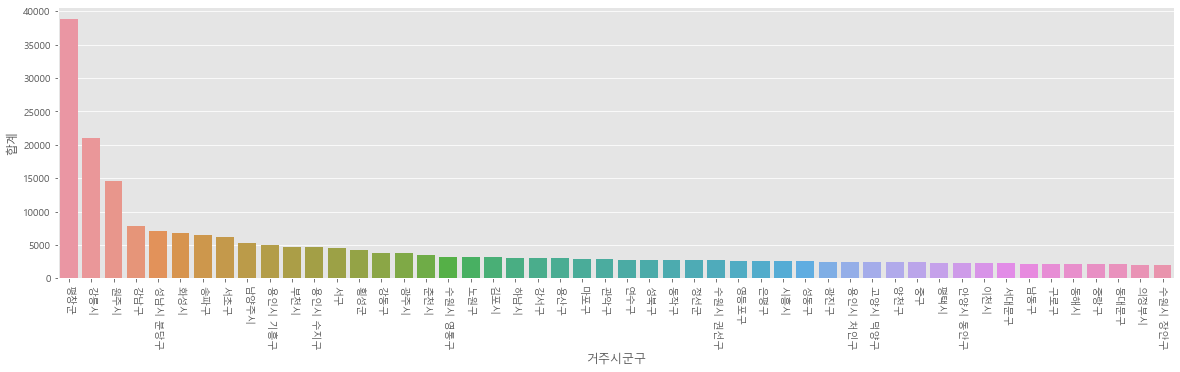

In [30]:
grouped_top50 = group.head(50)

plt.figure(figsize=(20,5))
sns.barplot(x=grouped_top50.index, y='합계', data= grouped_top50, ci=None,)
plt.xticks(rotation=-90)

plt.show();

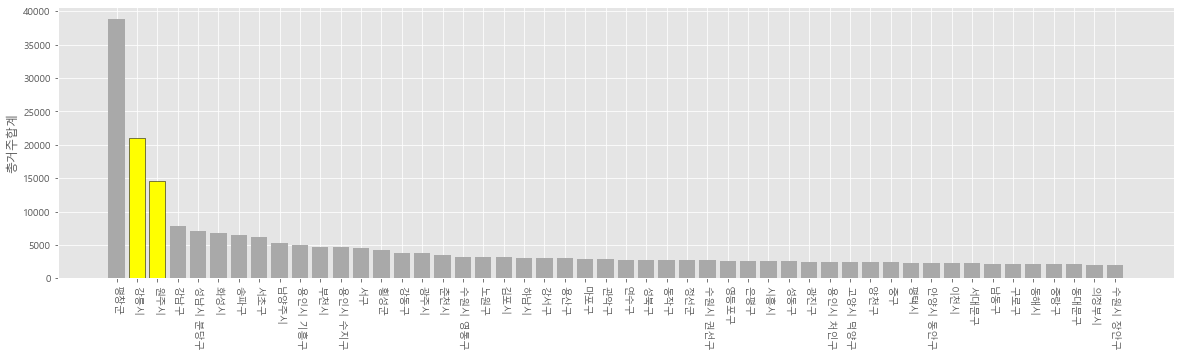

In [43]:
x = grouped_top50.index.values.copy()
y = grouped_top50.iloc[:, 0].values.copy()

fig, ax = plt.subplots(figsize=(20,5))
ax.bar(x,y,fc='darkgray')
plt.xticks(rotation=-90)
plt.ylabel('총거주합계')

bars = ax.patches
bars[1].set_facecolor("yellow")
bars[1].set_edgecolor("k")

bars[2].set_facecolor("yellow")
bars[2].set_edgecolor("k")

#### 거주시군구별 평창군에 방문한 인구 합계를 알기 위해서 무박인구수+숙박인구수를 y축으로, 거주시군구를 x축으로 시각화한 결과

In [56]:
df1.groupby(['시군구','거주시군구']).size().reset_index(name='counts').sort_values(by='counts',ascending=False)

,시군구,거주시군구,counts
104,평창군,원주시,2110
58,평창군,서구,1894
3,평창군,강릉시,1668
145,평창군,화성시,1620
70,평창군,송파구,1591
...,...,...,...
35,평창군,논산시,108
57,평창군,상주시,104
50,평창군,보령시,101
90,평창군,여수시,101


In [60]:
won = df1['거주시군구'] == '원주시'
gang = df1['거주시군구'] == '강릉시'
wg = df1[won|gang]

In [63]:
wg

,기준년월,시군구,거주시군구,읍면동,합계,무박인구수,숙박인구수
5,202211,평창군,원주시,대화면,14,6,8
6,202211,평창군,원주시,대화면,13,4,9
9,202211,평창군,강릉시,대화면,10,3,7
10,202211,평창군,원주시,대화면,9,4,5
11,202211,평창군,강릉시,대화면,8,5,3
...,...,...,...,...,...,...,...
84743,202111,평창군,원주시,대관령면,2,2,0
85027,202111,평창군,원주시,대관령면,1,1,0
85075,202111,평창군,원주시,대관령면,1,1,0
85400,202111,평창군,원주시,대관령면,1,1,0


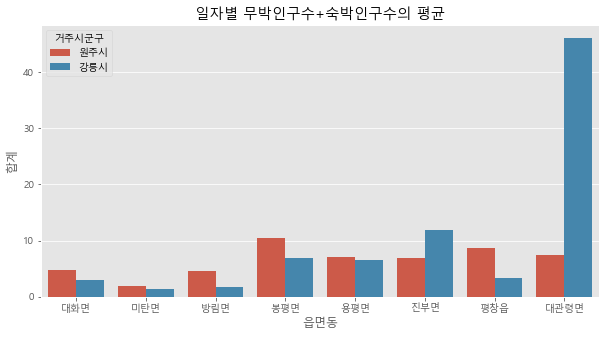

In [76]:
plt.figure(figsize=(10,5))
sns.barplot(x='읍면동',y='합계',hue='거주시군구',data=wg, ci=None)
plt.title('일자별 무박인구수+숙박인구수의 평균')
plt.show();

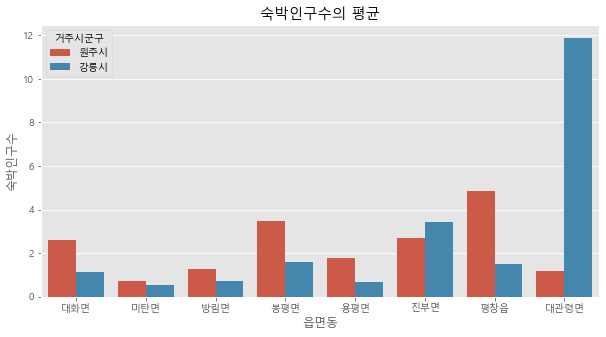

In [77]:
plt.figure(figsize=(10,5))
sns.barplot(x='읍면동',y='숙박인구수',hue='거주시군구',data=wg, ci=None)
plt.title('숙박인구수의 평균')
plt.show();

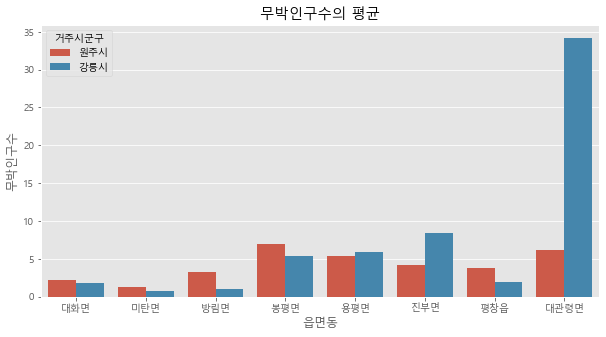

In [78]:
plt.figure(figsize=(10,5))
sns.barplot(x='읍면동',y='무박인구수',hue='거주시군구',data=wg, ci=None)
plt.title('무박인구수의 평균')
plt.show();

#### 대관령면에 방문한 강릉시 출신자들만 모은 데이터

In [83]:
dae = wg[wg['읍면동']=='대관령면']
dae = wg[wg['거주시군구']=='강릉시']
dae

,기준년월,시군구,거주시군구,읍면동,합계,무박인구수,숙박인구수
9,202211,평창군,강릉시,대화면,10,3,7
11,202211,평창군,강릉시,대화면,8,5,3
19,202211,평창군,강릉시,대화면,5,3,2
23,202211,평창군,강릉시,대화면,5,4,1
37,202211,평창군,강릉시,대화면,3,2,1
...,...,...,...,...,...,...,...
83876,202111,평창군,강릉시,대관령면,17,16,1
83886,202111,평창군,강릉시,대관령면,14,12,2
83896,202111,평창군,강릉시,대관령면,14,13,1
84299,202111,평창군,강릉시,대관령면,4,3,1
